# Loading the datasets

In [986]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
sns.set()

In [987]:
df = pd.read_csv('data/tmdb_movies_data.csv')
df_copy = df.copy()
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/2015,5562,6.5,2015,137999939.3,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/2015,6185,7.1,2015,137999939.3,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/2015,2480,6.3,2015,101199955.5,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/2015,5292,7.5,2015,183999919.0,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/2015,2947,7.3,2015,174799923.1,1.385749e+09


In [988]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

In [1162]:
df.isnull().sum()

id                       0
popularity               0
budget                   0
revenue                  0
original_title           0
cast                     4
director                 1
runtime                  0
genres                   0
production_companies    46
release_date             0
vote_count               0
release_year             0
profit                   0
dtype: int64

# Data Cleaning

In [990]:
#'duplicated()' function return the duplicate row as True and othter as False
# using the sum() functions we can count the duplicate elements 
sum(df.duplicated())

1

In [991]:
#Let's drop these row using 'drop_duplicates()' function
df.drop_duplicates(inplace=True)

In [992]:
# Let's check the dataframe shape to see just 1 row dropped.
print('Shape of Data Frame after droppping duplicated rows:\n(Rows : Cloumns):', df.shape)

Shape of Data Frame after droppping duplicated rows:
(Rows : Cloumns): (10865, 21)


In [993]:
#Changing Format Of Release Date Into Datetime Format
df['release_date'] = pd.to_datetime(df['release_date'])
df['release_date'].head()

0   2015-06-09
1   2015-05-13
2   2015-03-18
3   2015-12-15
4   2015-04-01
Name: release_date, dtype: datetime64[ns]

In [994]:
#Let's handle the budget and revenue
#this will replace the value of '0' to NaN of columns given in the list
df[['budget','revenue']] = df[['budget','revenue']].replace(0,np.NAN)

df.dropna(subset=['budget', 'revenue'], inplace=True)
print('After cleaning, we have {} rows'.format(df.shape[0]))

After cleaning, we have 3854 rows


In [995]:
df.columns

Index(['id', 'imdb_id', 'popularity', 'budget', 'revenue', 'original_title',
       'cast', 'homepage', 'director', 'tagline', 'keywords', 'overview',
       'runtime', 'genres', 'production_companies', 'release_date',
       'vote_count', 'vote_average', 'release_year', 'budget_adj',
       'revenue_adj'],
      dtype='object')

In [996]:
#Let's delete the unused columns
del_col = ['imdb_id', 'homepage','tagline', 'keywords', 'overview','vote_average', 'budget_adj','revenue_adj']
df.drop(del_col, axis=1, inplace=True)
print('We have {} rows and {} columns' .format(df.shape[0], df.shape[1]))

We have 3854 rows and 13 columns


In [997]:
#Before answering the questions, lets figure out the profits of each movie
df['profit'] = df['revenue']-df['budget']
df['profit'] = df['profit'].apply(np.int64)

In [998]:
df.head()

,id,popularity,budget,revenue,original_title,cast,director,runtime,genres,production_companies,release_date,vote_count,release_year,profit
0,135397,32.985763,150000000.0,1.513529e+09,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,5562,2015,1363528810
1,76341,28.419936,150000000.0,3.784364e+08,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,2015-05-13,6185,2015,228436354
2,262500,13.112507,110000000.0,2.952382e+08,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,2015-03-18,2480,2015,185238201
3,140607,11.173104,200000000.0,2.068178e+09,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,2015-12-15,5292,2015,1868178225
4,168259,9.335014,190000000.0,1.506249e+09,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,2015-04-01,2947,2015,1316249360


In [999]:
print(df.isnull().sum())

id                       0
popularity               0
budget                   0
revenue                  0
original_title           0
cast                     4
director                 1
runtime                  0
genres                   0
production_companies    46
release_date             0
vote_count               0
release_year             0
profit                   0
dtype: int64


In [1000]:
df.dtypes

id                               int64
popularity                     float64
budget                         float64
revenue                        float64
original_title                  object
cast                            object
director                        object
runtime                          int64
genres                          object
production_companies            object
release_date            datetime64[ns]
vote_count                       int64
release_year                     int64
profit                           int64
dtype: object

# Exploratory Data Analysis


In [1001]:
def find_min_max(col_name):
    #using idxmin()  and idxmax() functions to find min and max value of the given column.
    #idxmin to find the index of lowest in given col_name
    min_index = df[col_name].idxmin()
    #idxmax to find the index of highest in given col_name
    max_index = df[col_name].idxmax()
    #select the lowest and hisghest value from given col_name
    low  = pd.DataFrame(df.loc[min_index,:])
    high = pd.DataFrame(df.loc[max_index,:])
    #Print the results
    
    print('Movie which has highest '+col_name+' : ', df['original_title'][max_index])
    print('Movie which has lowest '+col_name+' : ', df['original_title'][min_index])
    return pd.concat([high,low], axis=1)
    

In [1170]:
def top_10(col_name,size=10):
    #find the all times top 10 for a fiven column
    #sort the given column and select the top 10
    df_sorted = pd.DataFrame(df[col_name].sort_values(ascending=False))[:size]
    df_sorted['original_title'] = df['original_title']
    
    #Calculate the avarage
    avg = np.mean(df[col_name])   
    sns.barplot(x=col_name, y='original_title', data=df_sorted, label=col_name)
    plt.axvline(avg, color='k', linestyle='--', label='mean')
    if (col_name == 'profit' or col_name == 'budget' or col_name == 'revenue'):
        plt.xlabel(col_name.capitalize() + ' (U.S Dolar)')
    else:
        plt.xlabel(col_name.capitalize())
    plt.ylabel('')
    plt.title('Top 10 Movies in: ' + col_name.capitalize())
    plt.legend()
    plt.savefig('figure/top_10_'+col_name+'.png')
   

In [1171]:
from matplotlib import gridspec
def each_year_best(col_name, size=15):
        #this function plot the last size=15 years best given varible 
        release = df[['release_year',col_name,'original_title']].sort_values(['release_year',col_name],
                                                                               ascending=False)
        # group by release year and find the best profit for each year
        release = pd.DataFrame(release.groupby(['release_year']).agg({col_name:[max,sum],
                                                                      'original_title':['first'] })).tail(size)
        #select the max from given column
        x_max = release.iloc[:,0]
        #select the sum from given column
        x_sum = release.iloc[:,1]
        #select the name title
        y_title = release.iloc[:,2]
        #select the index
        r_date = release.index  
        #plot the desirible variable
        fig = plt.figure(figsize=(12, 6))
        gs = gridspec.GridSpec(1, 2, width_ratios=[2, 2]) 
        ax0 = plt.subplot(gs[0])
        ax0 = sns.barplot(x=x_max, y=y_title, palette='deep')
        for j in range(len(r_date)):
            #put the year information on the plot
            ax0.text(j,j*1.02,r_date[j], fontsize=12, color='black')
        plt.title('Last ' +str(size)+ ' years highest ' +col_name+ ' movies for each year')
        plt.xlabel(col_name.capitalize())
        plt.ylabel('')
        ax1 = plt.subplot(gs[1])
        ax1 = sns.barplot(x=r_date, y=x_sum, palette='deep')
        plt.xticks(rotation=90) 
        plt.xlabel('Release Year')
        plt.ylabel('Total '+col_name.capitalize())
        plt.title('Last ' +str(size)+ ' years total '+ col_name)
        plt.tight_layout()
        plt.savefig('figure/each_year_best_'+col_name+'.png')
        
        

## What are all times highest and lowest profit movie?

In [1164]:
find_min_max('profit')

Movie which has highest profit :  Avatar
Movie which has lowest profit :  The Warrior's Way


,1386,2244
id,19995,46528
popularity,9.43277,0.25054
budget,2.37e+08,4.25e+08
revenue,2.78151e+09,1.10876e+07
original_title,Avatar,The Warrior's Way
cast,Sam Worthington|Zoe Saldana|Sigourney Weaver|S...,Kate Bosworth|Jang Dong-gun|Geoffrey Rush|Dann...
director,James Cameron,Sngmoo Lee
runtime,162,100
genres,Action|Adventure|Fantasy|Science Fiction,Adventure|Fantasy|Action|Western|Thriller
production_companies,Ingenious Film Partners|Twentieth Century Fox ...,Boram Entertainment Inc.


## What is all times top 10 movies which earn the higest profit?


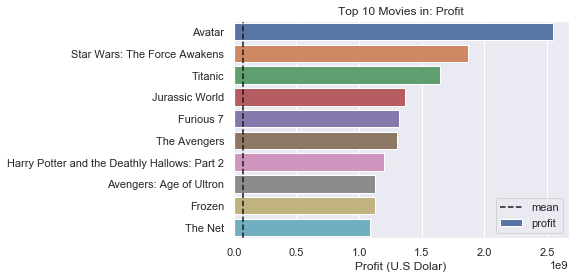

In [1172]:
top_10('profit')

## What is each year best profit movie?
Let's find out last 15 years best profit movie

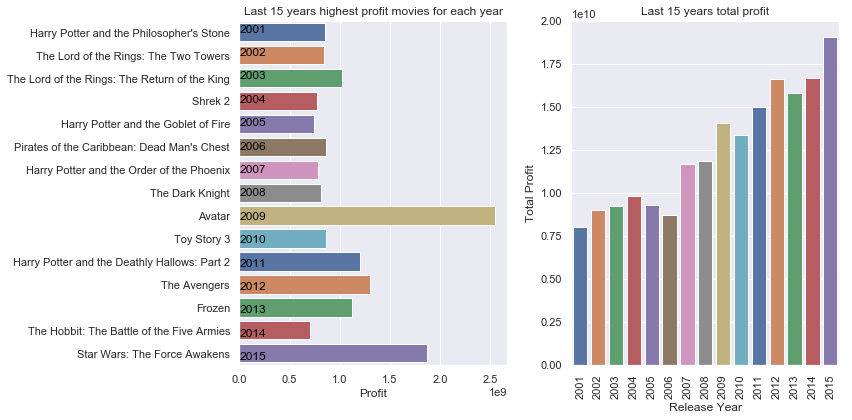

In [1173]:
each_year_best('profit')

## What is the All times highest and lowest budget movie?

In [1008]:
find_min_max('budget')

Movie which has highest budget :  The Warrior's Way
Movie which has lowest budget :  Lost & Found


,2244,2618
id,46528,39964
popularity,0.25054,0.090186
budget,4.25e+08,1
revenue,1.10876e+07,100
original_title,The Warrior's Way,Lost & Found
cast,Kate Bosworth|Jang Dong-gun|Geoffrey Rush|Dann...,David Spade|Sophie Marceau|Ever Carradine|Step...
director,Sngmoo Lee,Jeff Pollack
runtime,100,95
genres,Adventure|Fantasy|Action|Western|Thriller,Comedy|Romance
production_companies,Boram Entertainment Inc.,Alcon Entertainment|Dinamo Entertainment


## What is all times top 10 movies which have the higest budget?

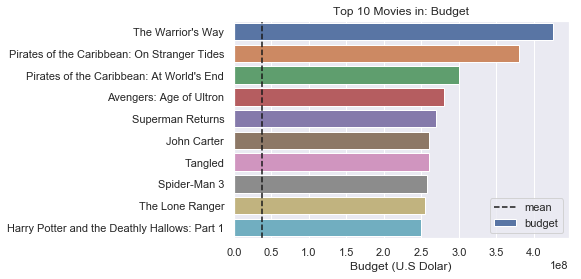

In [1174]:
top_10('budget')

## What are the highest budget movie and the total budget for each year?
Let's find out last 15 years highest budget movie and total budget for each year.

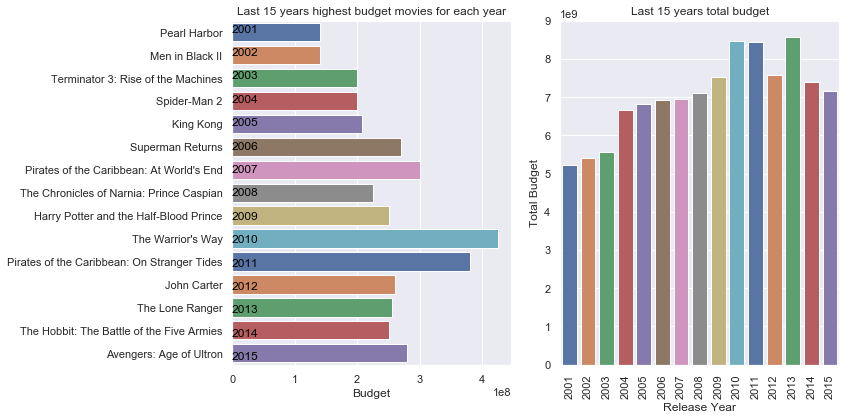

In [1175]:
each_year_best('budget')

## What is the All times highest and lowest revenue movie?

In [1011]:
find_min_max('revenue')

Movie which has highest revenue :  Avatar
Movie which has lowest revenue :  Shattered Glass


,1386,5067
id,19995,13537
popularity,9.43277,0.462609
budget,2.37e+08,6e+06
revenue,2.78151e+09,2
original_title,Avatar,Shattered Glass
cast,Sam Worthington|Zoe Saldana|Sigourney Weaver|S...,Hayden Christensen|Peter Sarsgaard|ChloÃ« Sevi...
director,James Cameron,Billy Ray
runtime,162,94
genres,Action|Adventure|Fantasy|Science Fiction,Drama|History
production_companies,Ingenious Film Partners|Twentieth Century Fox ...,Lions Gate Films|Cruise/Wagner Productions|Bau...


## What is the all times top 10 movies which has higest revenue?

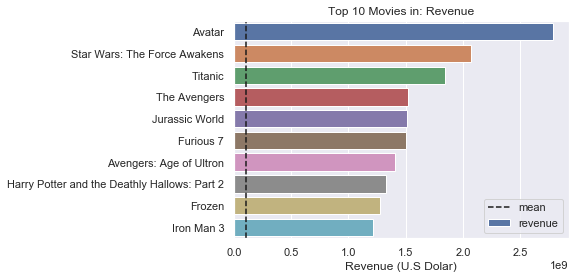

In [1176]:
top_10('revenue')

## What is each year highest budget movie? 

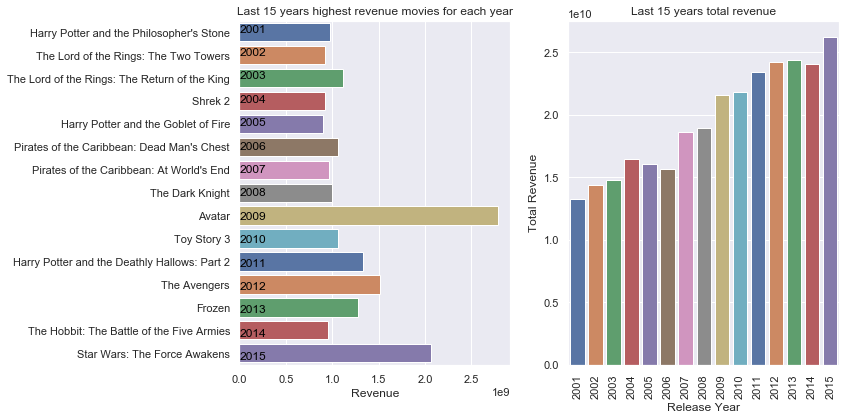

In [1177]:
each_year_best('revenue')

In [1014]:
find_min_max('runtime')

Movie which has highest runtime :  Carlos
Movie which has lowest runtime :  Kid's Story


,2107,5162
id,43434,24914
popularity,0.534192,0.208637
budget,1.8e+07,10
revenue,871279,5
original_title,Carlos,Kid's Story
cast,Edgar RamÃ­rez|Alexander Scheer|Fadi Abi Samra...,Clayton Watson|Keanu Reeves|Carrie-Anne Moss|K...
director,Olivier Assayas,Shinichiro Watanabe
runtime,338,15
genres,Crime|Drama|Thriller|History,Science Fiction|Animation
production_companies,Egoli Tossell Film AG|Canal+|Arte France|Films...,Studio 4Â°C


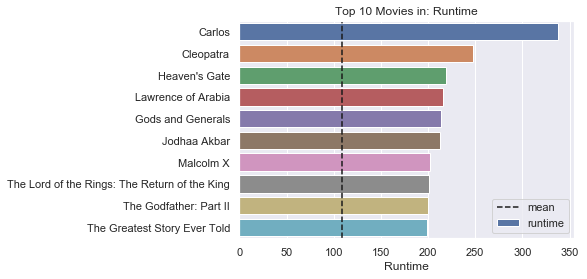

In [1178]:
top_10('runtime')

In [1179]:
def split_count_data(col_name, size=15):
    ##function which will take any column as argument from which data is need to be extracted and keep track of count
    #take a given column, and separate the string by '|'
    data = df[col_name].str.cat(sep='|')
    #storing the values separately in the series
    data = pd.Series(data.split('|'))
    #Let's count the most frequenties values for given column
    count = data.value_counts(ascending=False)
    count_size = count.head(size)
    #Setting axis name for multiple names
    if (col_name == 'production_companies'):
        sp = col_name.split('_')
        axis_name = sp[0].capitalize()+' '+ sp[1].capitalize()
    else:
        axis_name = col_name.capitalize()
    fig = plt.figure(figsize=(14, 6))
    #set the subplot 
    gs = gridspec.GridSpec(1,2, width_ratios=[2,2])
    #count of given column on the bar plot
    ax0 = plt.subplot(gs[0])
    count_size.plot.barh()
    plt.xlabel('Number of Movies')
    plt.ylabel(axis_name)
    plt.title('The Most '+str(size)+' Filmed ' +axis_name+' Versus Number of Movies')
    ax = plt.subplot(gs[1])
    #setting the explode to adjust the pei chart explode variable to any given size
    explode = []
    total = 0
    for i in range(size):
         total = total + 0.015
         explode.append(total)
    #pie chart for given size and given column
    ax = count_size.plot.pie(autopct='%1.2f%%', shadow=True, startangle=0, pctdistance=0.9, explode=explode)
    plt.title('The most '+str(size)+' Filmed ' +axis_name+ ' in Pie Chart')
    plt.xlabel('')
    plt.ylabel('')
    plt.axis('equal')
    plt.legend(loc=9, bbox_to_anchor=(1.4, 1))
    plt.savefig('figure/split_count_date_'+col_name+'.png')
    
    

## Which genre were more successful?

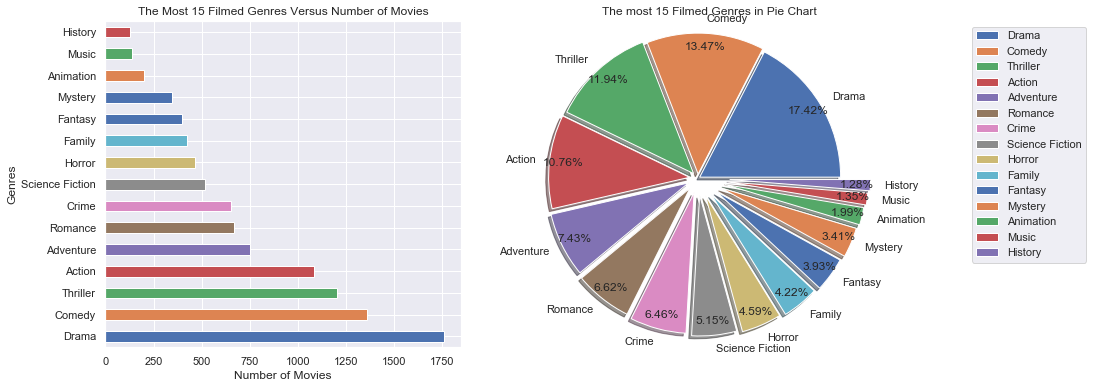

In [1180]:
split_count_data('genres')                                                

## Which cast were more filmed?

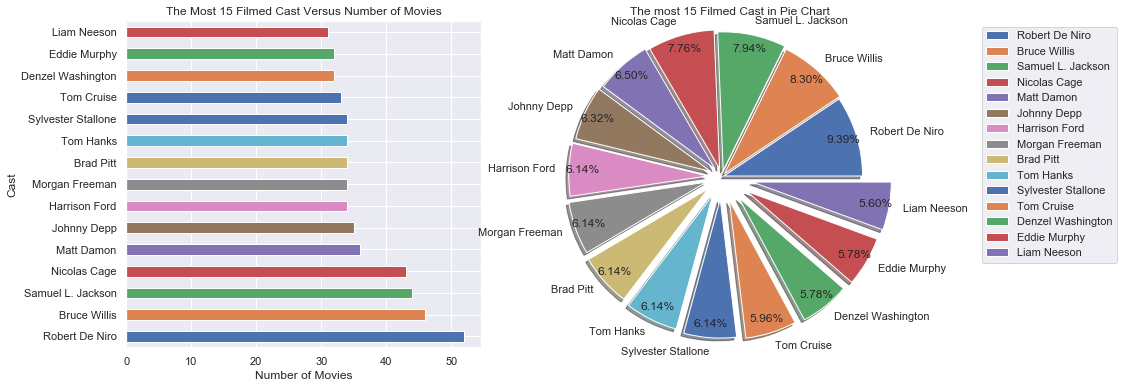

In [1181]:
split_count_data('cast')

## Which director were most filmed?

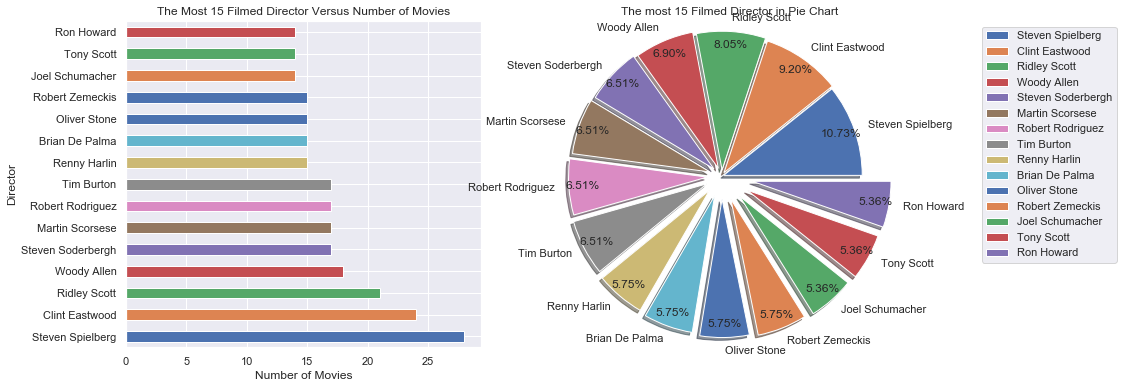

In [1182]:
split_count_data('director')

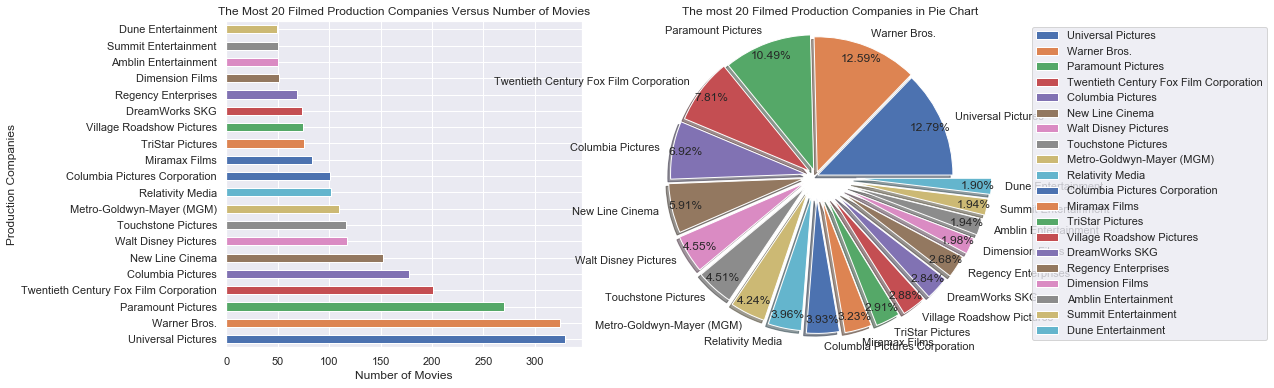

In [1096]:
split_count_data('production_companies', size=20)

## What is the Number of movies released in each month? What is the total profit by month?

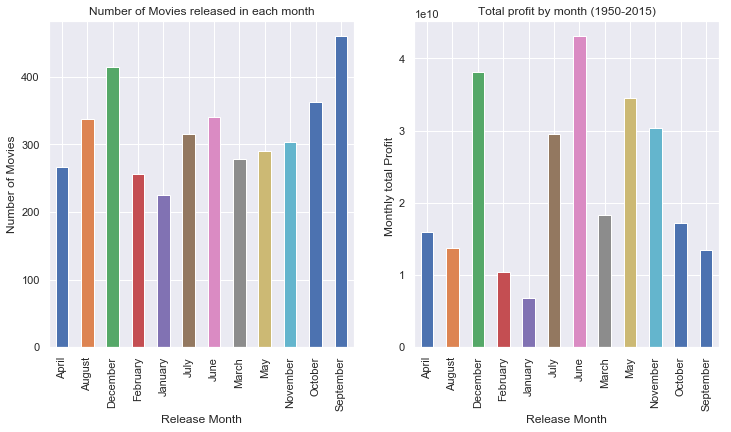

In [1184]:
df_month = df.copy()
df_month['release_month'] = df_month['release_date'].dt.strftime("%B")

fig = plt.figure(figsize=(12,6))
count_month = df_month.groupby('release_month')['profit'].count()
plt.subplot(1,2,1)
count_month.plot.bar()
plt.xlabel('Release Month')
plt.ylabel('Number of Movies')
plt.title('Number of Movies released in each month')

plt.subplot(1,2,2)
sum_month = df_month.groupby('release_month')['profit'].sum()
sum_month.plot.bar()
plt.xlabel('Release Month')
plt.ylabel('Monthly total Profit ')
plt.title('Total profit by month (1950-2015)')
plt.savefig('figure/release_month_.png')

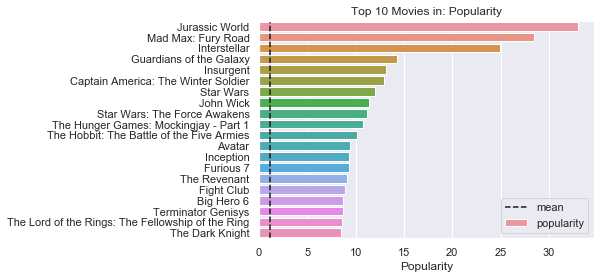

In [1161]:
top_10('popularity', size=20)

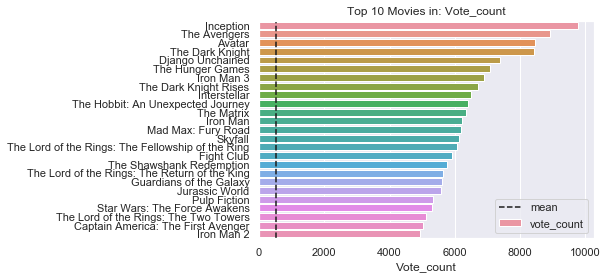

In [1160]:
top_10('vote_count', size=25)